In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Histogram_plot(img_in,save_result = True):
    img_color = cv2.imread(img_in)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    img_out = cv2.equalizeHist(img_gray)
    if save_result:
        cv2.imwrite('moon_equalized.png', img_out)
        hist_plot(img_gray, img_out)
    return img_out

In [40]:
def hist_plot(img_in,img_out):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img_in, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(img_out, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Histogram")
    plt.hist(img_in.ravel(), 256, [0, 256], color='blue')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    plt.title("Equalized Histogram")
    plt.hist(img_out.ravel(), 256, [0, 256], color='green')
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

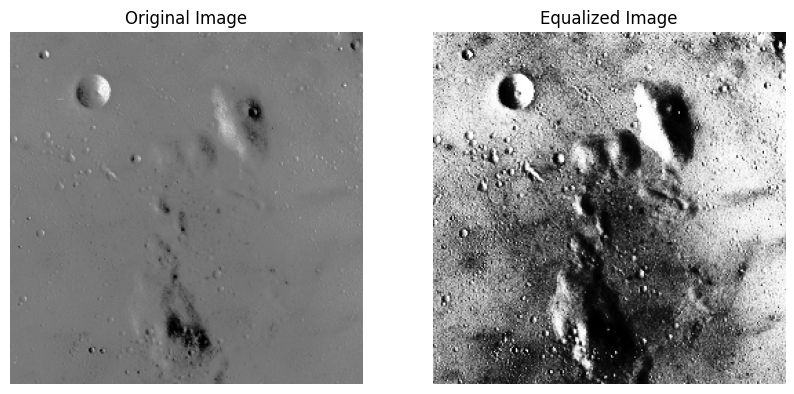

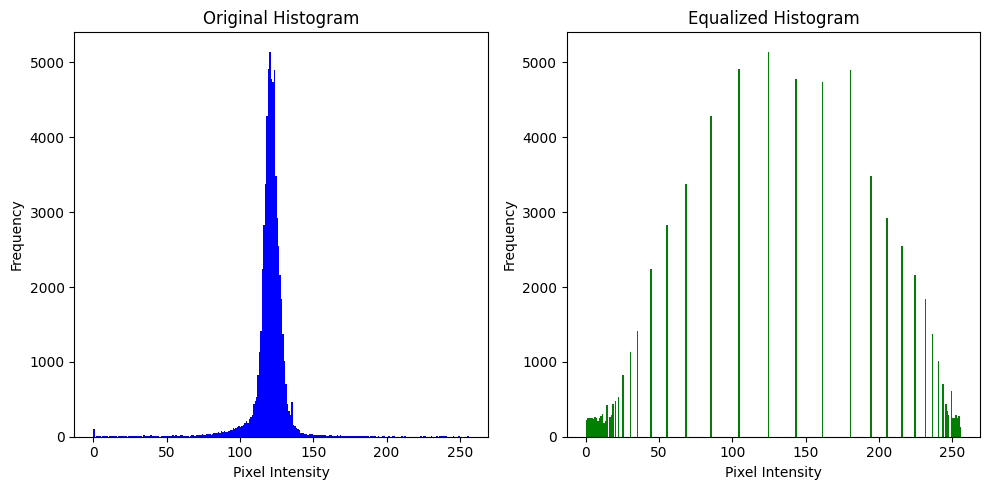

In [41]:
hist = Histogram_plot("moon.bmp")

# Extra Credit

In [42]:
def linear_correla(img_gray):
    return cv2.normalize(img_gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

In [43]:
def quadratic_correla(img_gray):
    img_float = img_gray.astype(np.float32) / 255.0
    correc = np.clip(255.0 * np.sqrt(img_float), 0, 255).astype(np.uint8)
    return correc

In [44]:
def plot_histograms(images, titles, colors):
    plt.figure(figsize=(18, 10))
    for i, (img, title, color) in enumerate(zip(images, titles, colors), 1):
        plt.subplot(2, 3, i)
        plt.title(f"{title} Histogram")
        plt.hist(img.ravel(), 256, [0, 256], color=color)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [45]:
img_path = 'moon.bmp'
img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [46]:
img_linear = linear_correla(hist)
img_quadratic = quadratic_correla(hist)

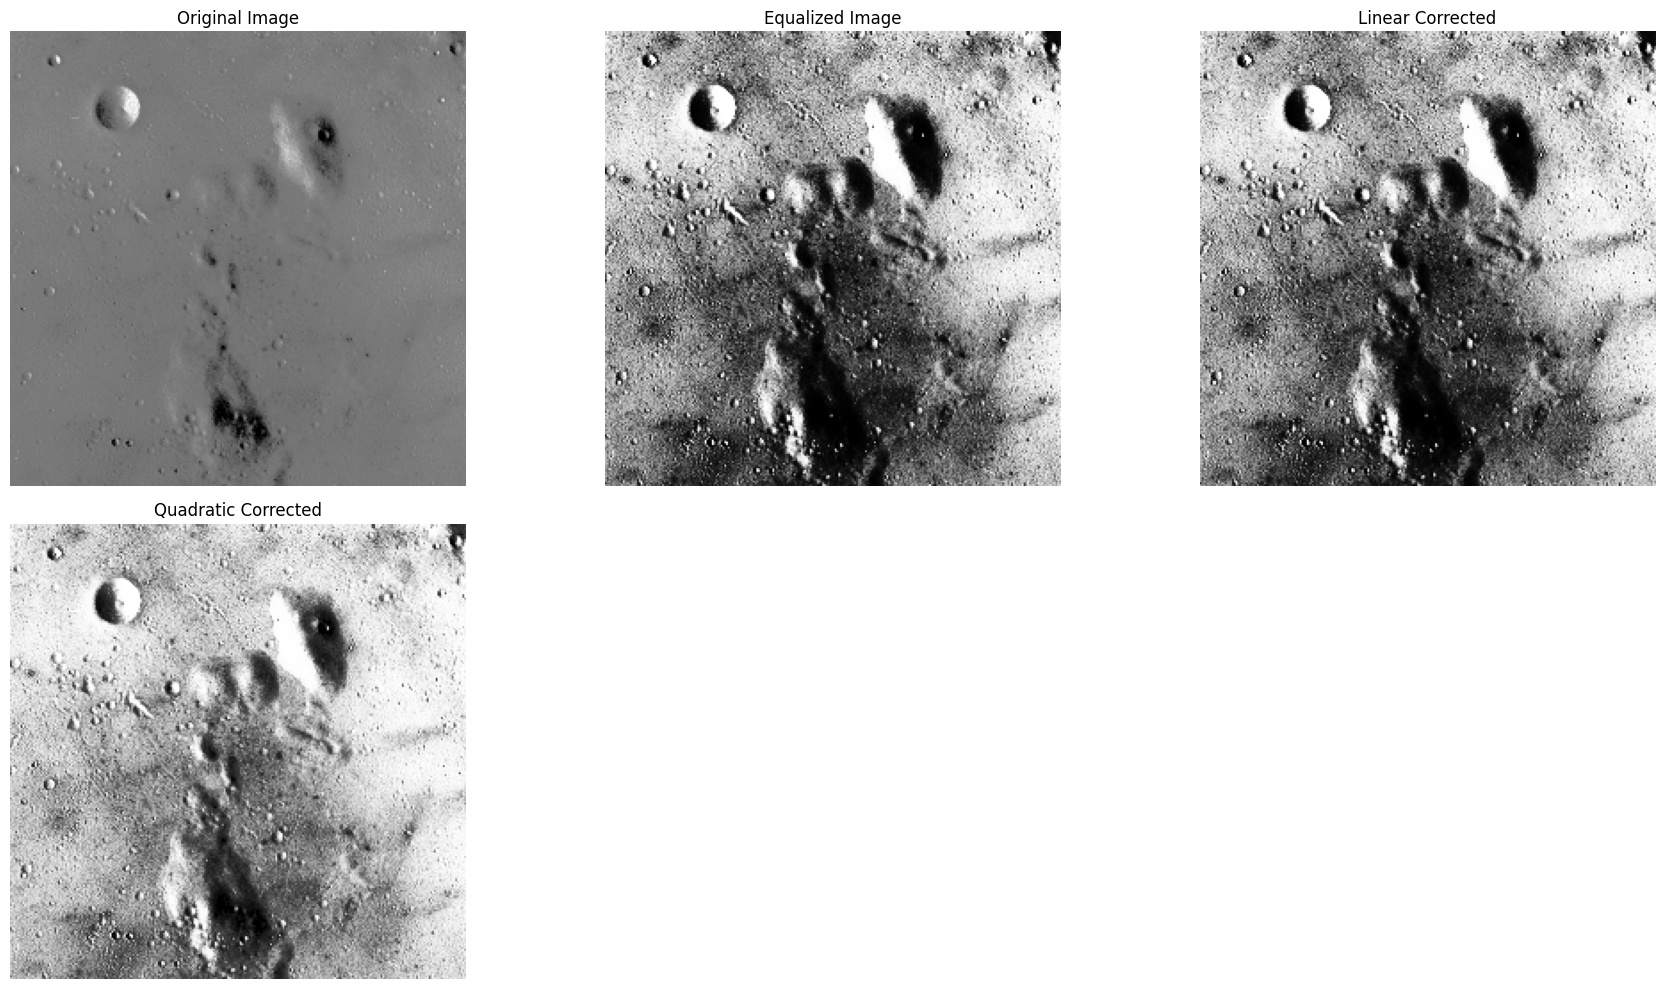

In [47]:
plt.figure(figsize=(18, 10))

titles = ['Original Image', 'Equalized Image', 'Linear Corrected', 'Quadratic Corrected']
images = [img_original, hist, img_linear, img_quadratic]

for i, (img, title) in enumerate(zip(images, titles), 1):
    plt.subplot(2, 3, i)
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


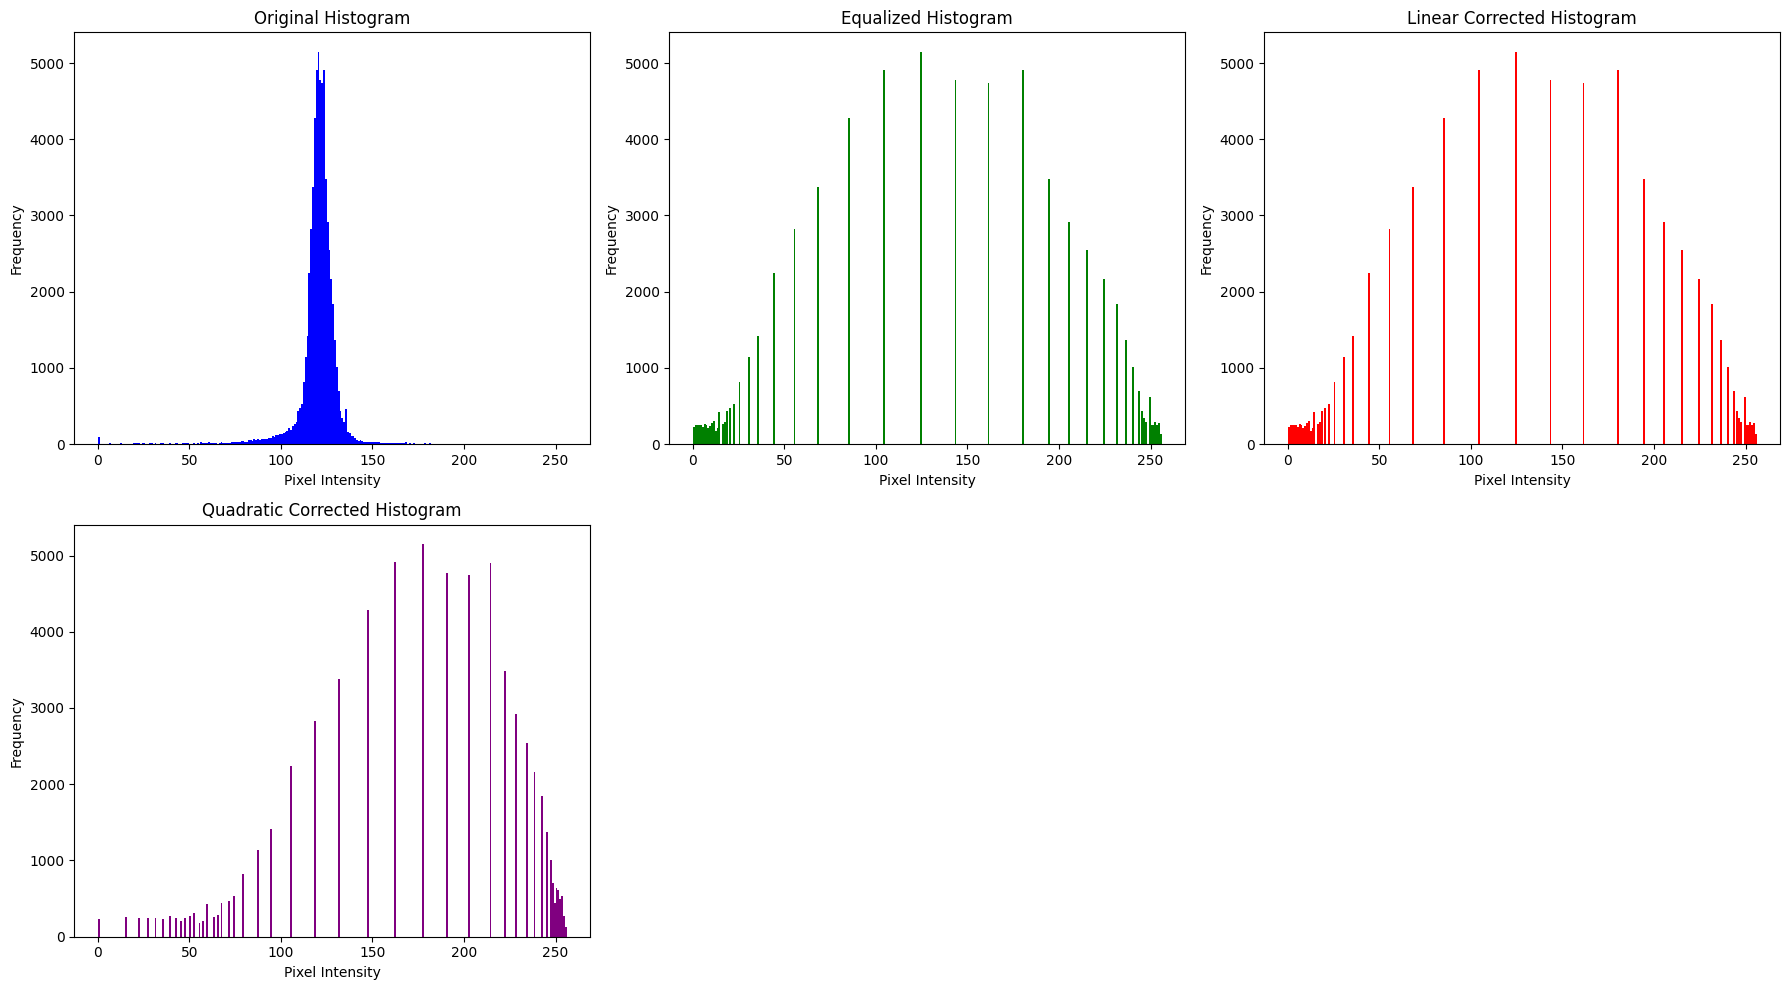

In [48]:
plot_histograms(
    images,
    titles=['Original', 'Equalized', 'Linear Corrected', 'Quadratic Corrected'],
    colors=['blue', 'green', 'red', 'purple']
)